In [1]:
# This Python 3 environment comes with many helpful analytics libraries installed
# It is defined by the kaggle/python Docker image: https://github.com/kaggle/docker-python
# For example, here's several helpful packages to load

import numpy as np # linear algebra
import pandas as pd # data processing, CSV file I/O (e.g. pd.read_csv)

# Input data files are available in the read-only "../input/" directory
# For example, running this (by clicking run or pressing Shift+Enter) will list all files under the input directory

import os
for dirname, _, filenames in os.walk('/kaggle/input'):
    for filename in filenames:
        print(os.path.join(dirname, filename))

# You can write up to 5GB to the current directory (/kaggle/working/) that gets preserved as output when you create a version using "Save & Run All" 
# You can also write temporary files to /kaggle/temp/, but they won't be saved outside of the current session

/kaggle/input/titanicdataset-traincsv/train.csv


In [2]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import sklearn.preprocessing as skpe
import sklearn.metrics as sklm
import sklearn.model_selection as ms
from sklearn.tree import DecisionTreeClassifier
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import BaggingClassifier

In [3]:
path="../input/titanicdataset-traincsv/train.csv"
df=pd.read_csv(path)
df.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [4]:
df.shape

(891, 12)

In [5]:
df.columns

Index(['PassengerId', 'Survived', 'Pclass', 'Name', 'Sex', 'Age', 'SibSp',
       'Parch', 'Ticket', 'Fare', 'Cabin', 'Embarked'],
      dtype='object')

In [6]:
# Variable Identification
df.dtypes

PassengerId      int64
Survived         int64
Pclass           int64
Name            object
Sex             object
Age            float64
SibSp            int64
Parch            int64
Ticket          object
Fare           float64
Cabin           object
Embarked        object
dtype: object

In [7]:
# or you can use info() method
df.info()    # Name,Sex,Ticket,Cabin and Embarked are categorical variables els are continuous 

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [8]:
# Univariate Analysis 
# Continuous Varaible
df.describe()   # Describe method shows only continuous variables

,PassengerId,Survived,Pclass,Age,SibSp,Parch,Fare
count,891.000000,891.000000,891.000000,714.000000,891.000000,891.000000,891.000000
mean,446.000000,0.383838,2.308642,29.699118,0.523008,0.381594,32.204208
std,257.353842,0.486592,0.836071,14.526497,1.102743,0.806057,49.693429
min,1.000000,0.000000,1.000000,0.420000,0.000000,0.000000,0.000000
25%,223.500000,0.000000,2.000000,20.125000,0.000000,0.000000,7.910400
50%,446.000000,0.000000,3.000000,28.000000,0.000000,0.000000,14.454200
75%,668.500000,1.000000,3.000000,38.000000,1.000000,0.000000,31.000000
max,891.000000,1.000000,3.000000,80.000000,8.000000,6.000000,512.329200


/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:839: RuntimeWarning: invalid value encountered in greater_equal
  keep = (tmp_a >= first_edge)
/opt/conda/lib/python3.7/site-packages/numpy/lib/histograms.py:840: RuntimeWarning: invalid value encountered in less_equal
  keep &= (tmp_a <= last_edge)


Text(0.5, 0, 'Age')

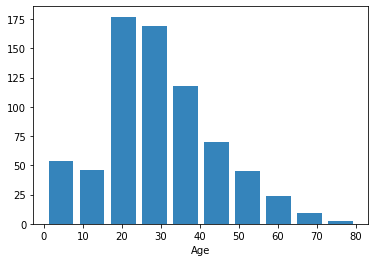

In [9]:
# Note:-Frequency table is used for categorical - categorical variables; scatter plot is used for continuous – continuous variables; and histogram is used to plot single variable.
plt.hist(df['Age'],alpha=0.9, rwidth=0.8)
plt.xlabel('Age')     # This is a bit right-skewed

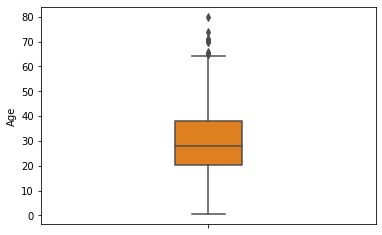

In [10]:
sns.boxplot(y=df['Age'],data=df,width=.2,palette='autumn')   # There are a few points lying outside the max value sns.boxplot(y=df['Age'],data=df,width=.2,palette='autumn')   # There are a few points lying outside the max value 

Text(0.5, 0, 'Fare')

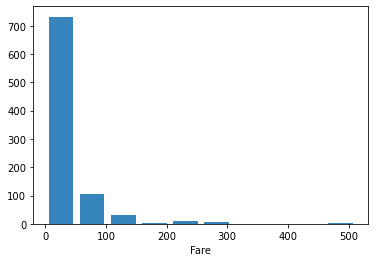

In [11]:
plt.hist(df['Fare'],alpha=0.9, rwidth=0.8)
plt.xlabel('Fare')

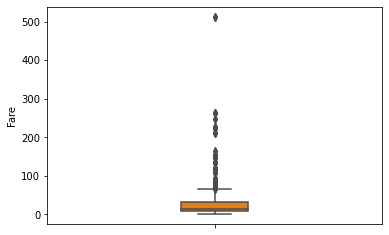

In [12]:
sns.boxplot(y=df['Fare'],data=df,width=.2,palette='autumn')   # There are many points lying outside the max range

In [13]:
# Categrical Variable
df['Sex'].value_counts()/len(df['Sex'])*100

male      64.758698
female    35.241302
Name: Sex, dtype: float64

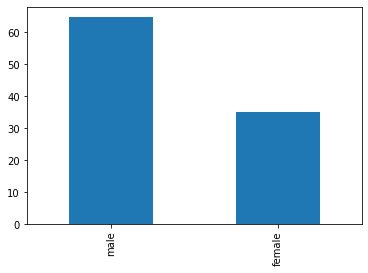

In [14]:
(df['Sex'].value_counts()/len(df['Sex'])*100).plot.bar()   # Frequency Chart

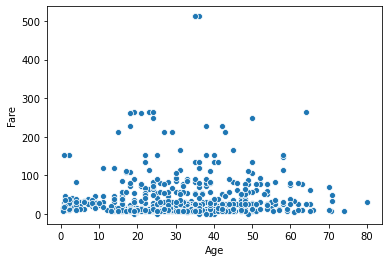

In [15]:
# Bivariate Analysis
# Continuous-Continuous Variable
sns.scatterplot(x='Age',y='Fare',data=df,legend='brief')   # There are two points present above 500 mark

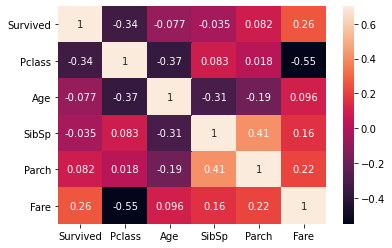

In [16]:
# Checking correlation bw different variables
sns.heatmap(df.drop('PassengerId',axis=1).corr(),vmax=.7,cbar=True,annot=True)

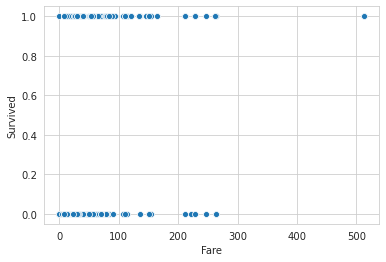

In [17]:
sns.set_style(style='whitegrid')
sns.scatterplot(x='Fare',y='Survived',data=df)

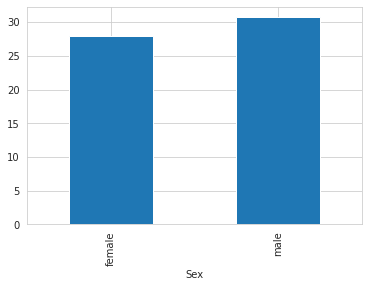

In [18]:
# Categorical -Continuous Bivariate Analysis
df.groupby('Sex')['Age'].mean().plot.bar()

In [19]:
from scipy import stats
# But there could be sample indifferences so we perform a ttest to or know if the mean age of both male and female are statistically different or not
males=df[df['Sex']=='male']
females=df[df['Sex']=='female']
stats.ttest_ind(males['Age'],females['Age'],nan_policy='omit') # nan policy is to ignore missing values
# For the two groups to be statistically diiferent pvalue should be < 0.05

Ttest_indResult(statistic=2.499206354920835, pvalue=0.012671296797014266)

In [20]:
# Categorical -Categorical Bivariate Analysis
# Now we want to know the relationship b/w gender and survival rate,so,we make a two-way table
pd.crosstab(df['Sex'],df['Survived'])

Survived,0,1
Sex,,
female,81,233
male,468,109


In [21]:
# This doesn't tell us the whole story so we perform chi-square test
stats.chi2_contingency(pd.crosstab(df['Sex'],df['Survived']))  # First value is chi-square statistic and second is the p-value which is less than 0.05

(260.71702016732104,
 1.1973570627755645e-58,
 1,
 array([[193.47474747, 120.52525253],
        [355.52525253, 221.47474747]]))

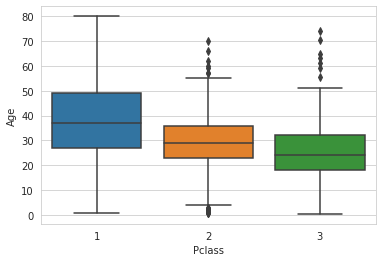

In [22]:
sns.boxplot(data=df, y='Age', x='Pclass')

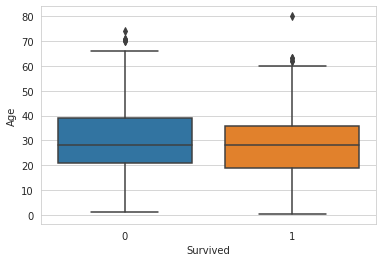

In [23]:
sns.boxplot(data=df, y='Age', x='Survived')

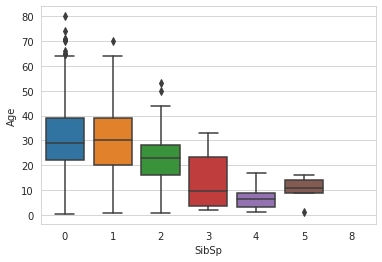

In [24]:
sns.boxplot(data=df, y='Age', x='SibSp')

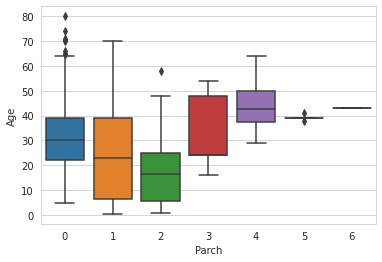

In [25]:
sns.boxplot(data=df, y='Age', x='Parch')

In [26]:
# Trating Missing Values
df.isnull().sum() 

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64

In [27]:
# Deletion of rows and columns for this much missing values might not be useful,so ,we can impute them with mean of their column
df['Age']=df['Age'].fillna(df['Age'].mean())

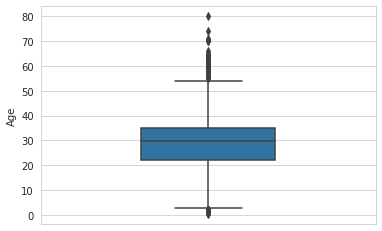

In [28]:
# Outlier Detection
# Univariate Outlier Detection
sns.boxplot(y='Age',data=df,width=.4)

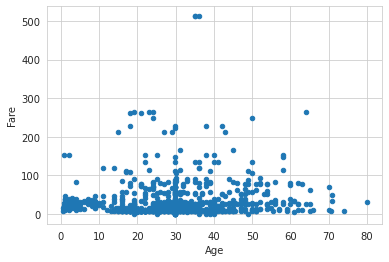

In [29]:
# Bivariate Outlier Detection
df.plot.scatter('Age','Fare')

In [30]:
# Removing outliers from dataset
df = df.drop(df[(df['Fare']>400) & (df['Age']>30)].index)

In [31]:
df = df.drop(df[(df['Fare']>500) & (df['Survived']>0.8)].index)   # Dropping that person who gave more than 500 bucks as fare

In [32]:
df = df.drop(df[(df['Age']>79) & (df['Survived']>0.8)].index)  # Dropping that 80 year old person

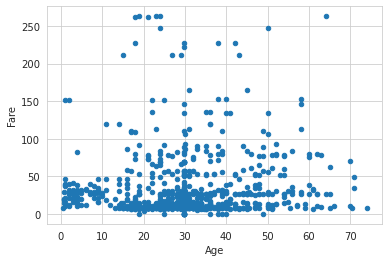

In [33]:
df.plot.scatter('Age','Fare')     # This is better than the previous scatter plot

0.3956860611315026

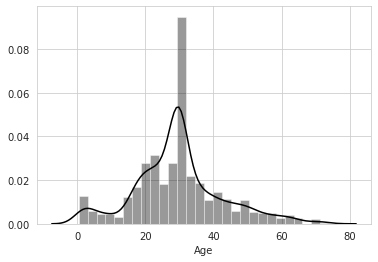

In [34]:
# Variable Transformation
sns.distplot(df['Age'],color='Black')
df['Age'].skew()   # This is not a normal distribution

-2.6862621666007303

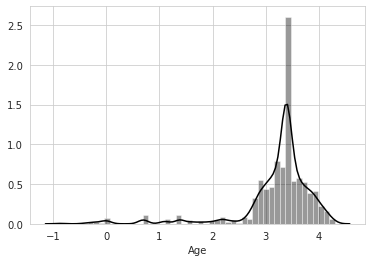

In [35]:
sns.distplot(np.log(df['Age']),color='Black')
np.log(df['Age']).skew()

-0.8450092125973371

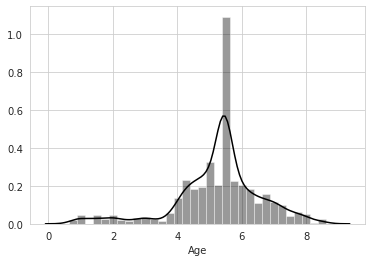

In [36]:
sns.distplot(np.sqrt(df['Age']),color='Black')
np.sqrt(df['Age']).skew()

In [37]:
df.isnull().sum()

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age              0
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          686
Embarked         2
dtype: int64

In [38]:
df['Cabin'].unique()

array([nan, 'C85', 'C123', 'E46', 'G6', 'C103', 'D56', 'A6',
       'C23 C25 C27', 'B78', 'D33', 'B30', 'C52', 'B28', 'C83', 'F33',
       'F G73', 'E31', 'A5', 'D10 D12', 'D26', 'C110', 'B58 B60', 'E101',
       'F E69', 'D47', 'B86', 'F2', 'C2', 'E33', 'B19', 'A7', 'C49', 'F4',
       'A32', 'B4', 'B80', 'A31', 'D36', 'D15', 'C93', 'C78', 'D35',
       'C87', 'B77', 'E67', 'B94', 'C125', 'C99', 'C118', 'D7', 'A19',
       'B49', 'D', 'C22 C26', 'C106', 'C65', 'E36', 'C54',
       'B57 B59 B63 B66', 'C7', 'E34', 'C32', 'B18', 'C124', 'C91', 'E40',
       'T', 'C128', 'D37', 'B35', 'E50', 'C82', 'B96 B98', 'E10', 'E44',
       'A34', 'C104', 'C111', 'C92', 'E38', 'D21', 'E12', 'E63', 'A14',
       'B37', 'C30', 'D20', 'B79', 'E25', 'D46', 'B73', 'C95', 'B38',
       'B39', 'B22', 'C86', 'C70', 'A16', 'C101', 'C68', 'A10', 'E68',
       'B41', 'A20', 'D19', 'D50', 'D9', 'B50', 'A26', 'D48', 'E58',
       'C126', 'B71', 'D49', 'B5', 'B20', 'F G63', 'C62 C64', 'E24',
       'C90', 'C45', 

In [39]:
df['Cabin'].fillna(value="NA",inplace=True) #Filling Cabin

In [40]:
def take_section(code):
    return code[0]
df['Cabin']=df['Cabin'].apply(take_section)

In [41]:
df['Cabin'].unique()

array(['N', 'C', 'E', 'G', 'D', 'A', 'B', 'F', 'T'], dtype=object)

In [42]:
df['Embarked'].unique()

array(['S', 'C', 'Q', nan], dtype=object)

In [43]:
df['Embarked'].fillna(df['Embarked'].mode()[0], inplace=True)  #Filling Embarked

In [44]:
df.dropna(subset=['Age'],axis=0,inplace=True)     # Treating a single missing entry which i don't know what it is so i dropped that whole row
df.reset_index(drop=True,inplace=True)      # Resetting index

In [45]:
df=df.drop(['PassengerId'],axis=1)

In [46]:
df=df.drop(['Ticket'],axis=1)

In [47]:
# Using expression pattern to extract the Title of the passenger
df['Title'] = df.Name.str.extract(' ([A-Za-z]+)\.', expand=False)

# Changing to common category
df['Title'] = df['Title'].replace(['Dr', 'Rev', 'Col', 'Major', 'Countess', 'Sir', 'Jonkheer', 'Lady', 'Capt', 'Don'], 'Others')
df['Title'] = df['Title'].replace('Ms', 'Miss')
df['Title'] = df['Title'].replace('Mme', 'Mrs')
df['Title'] = df['Title'].replace('Mlle', 'Miss')

In [48]:
df['FamilySize'] = df['SibSp'] + df['Parch'] + 1

In [49]:
df.drop(['Name'],axis=1,inplace=True)

In [50]:
df.head()

,Survived,Pclass,Sex,Age,SibSp,Parch,Fare,Cabin,Embarked,Title,FamilySize
0,0,3,male,22.0,1,0,7.2500,N,S,Mr,2
1,1,1,female,38.0,1,0,71.2833,C,C,Mrs,2
2,1,3,female,26.0,0,0,7.9250,N,S,Miss,1
3,1,1,female,35.0,1,0,53.1000,C,S,Mrs,2
4,0,3,male,35.0,0,0,8.0500,N,S,Mr,1


In [51]:
df.dtypes

Survived        int64
Pclass          int64
Sex            object
Age           float64
SibSp           int64
Parch           int64
Fare          float64
Cabin          object
Embarked       object
Title          object
FamilySize      int64
dtype: object

In [52]:
df['Parch']=df['Parch'].astype('object')

In [53]:
df['SibSp']=df['SibSp'].astype('object')

In [54]:
df=pd.get_dummies(df)
df.head()

,Survived,Pclass,Age,Fare,FamilySize,Sex_female,Sex_male,SibSp_0,SibSp_1,SibSp_2,...,Cabin_N,Cabin_T,Embarked_C,Embarked_Q,Embarked_S,Title_Master,Title_Miss,Title_Mr,Title_Mrs,Title_Others
0,0,3,22.0,7.2500,2,0,1,0,1,0,...,1,0,0,0,1,0,0,1,0,0
1,1,1,38.0,71.2833,2,1,0,0,1,0,...,0,0,1,0,0,0,0,0,1,0
2,1,3,26.0,7.9250,1,1,0,1,0,0,...,1,0,0,0,1,0,1,0,0,0
3,1,1,35.0,53.1000,2,1,0,0,1,0,...,0,0,0,0,1,0,0,0,1,0
4,0,3,35.0,8.0500,1,0,1,1,0,0,...,1,0,0,0,1,0,0,1,0,0


In [55]:
# Segregating Features and Labels
x=df.drop(['Survived'],axis=1)
y=df['Survived']

In [56]:
train_x,test_x,train_y,test_y=ms.train_test_split(x,y,random_state=1,stratify=y)

In [57]:
scaler=skpe.StandardScaler()
train_x_scaled=scaler.fit_transform(train_x)
train_x_scaled=pd.DataFrame(train_x_scaled,columns=x.columns)
test_x_scaled=scaler.fit_transform(test_x)
test_x_scaled=pd.DataFrame(test_x_scaled,columns=x.columns)

In [58]:
from sklearn.linear_model import LogisticRegression
logreg=LogisticRegression(solver='liblinear')
logreg.fit(train_x,train_y)

/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)


LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
                   intercept_scaling=1, l1_ratio=None, max_iter=100,
                   multi_class='auto', n_jobs=None, penalty='l2',
                   random_state=None, solver='lbfgs', tol=0.0001, verbose=0,
                   warm_start=False)

In [59]:
# Making predictions using predict_proba function
probabilities=logreg.predict_proba(test_x)
probabilities

array([[0.40311582, 0.59688418],
       [0.92470399, 0.07529601],
       [0.17825627, 0.82174373],
       [0.19485399, 0.80514601],
       [0.76797655, 0.23202345],
       [0.91587658, 0.08412342],
       [0.13702113, 0.86297887],
       [0.22862241, 0.77137759],
       [0.90219277, 0.09780723],
       [0.92081446, 0.07918554],
       [0.81898021, 0.18101979],
       [0.02553467, 0.97446533],
       [0.89970355, 0.10029645],
       [0.58476334, 0.41523666],
       [0.9713208 , 0.0286792 ],
       [0.91593703, 0.08406297],
       [0.92081446, 0.07918554],
       [0.92727945, 0.07272055],
       [0.30643602, 0.69356398],
       [0.90336057, 0.09663943],
       [0.11627554, 0.88372446],
       [0.37976955, 0.62023045],
       [0.89232698, 0.10767302],
       [0.90398413, 0.09601587],
       [0.83937933, 0.16062067],
       [0.960896  , 0.039104  ],
       [0.77220759, 0.22779241],
       [0.84043353, 0.15956647],
       [0.93545467, 0.06454533],
       [0.91874005, 0.08125995],
       [0.

In [60]:
test_preds=probabilities[:,1]
test_preds

array([0.59688418, 0.07529601, 0.82174373, 0.80514601, 0.23202345,
       0.08412342, 0.86297887, 0.77137759, 0.09780723, 0.07918554,
       0.18101979, 0.97446533, 0.10029645, 0.41523666, 0.0286792 ,
       0.08406297, 0.07918554, 0.07272055, 0.69356398, 0.09663943,
       0.88372446, 0.62023045, 0.10767302, 0.09601587, 0.16062067,
       0.039104  , 0.22779241, 0.15956647, 0.06454533, 0.08125995,
       0.31857861, 0.94650541, 0.23901264, 0.18198632, 0.07683646,
       0.68637812, 0.74404204, 0.62710765, 0.79831227, 0.6980024 ,
       0.75084255, 0.20937902, 0.74866903, 0.09749339, 0.20977581,
       0.9191129 , 0.20218391, 0.13082443, 0.1091933 , 0.07524418,
       0.43791493, 0.15658413, 0.64270095, 0.92667066, 0.07512806,
       0.08714486, 0.15437906, 0.10094712, 0.09990853, 0.82712528,
       0.10236943, 0.22254389, 0.10660532, 0.07531703, 0.67296494,
       0.22191754, 0.90789806, 0.64270095, 0.2854236 , 0.10029645,
       0.17718903, 0.47242637, 0.73753081, 0.22953334, 0.09461

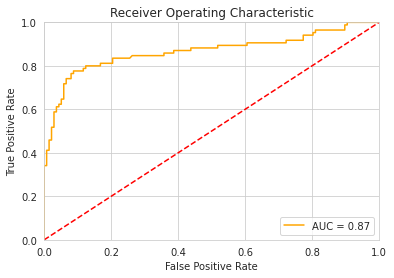

In [61]:
def plot_auc(labels, probs):
    ## Compute the false positive rate, true positive rate
    ## and threshold along with the AUC
    fpr, tpr, threshold = sklm.roc_curve(labels, probs[:,1])
    auc = sklm.auc(fpr, tpr)
    
    ## Plot the result
    plt.title('Receiver Operating Characteristic')
    plt.plot(fpr, tpr, color = 'orange', label = 'AUC = %0.2f' % auc)
    plt.legend(loc = 'lower right')
    plt.plot([0, 1], [0, 1],'r--')
    plt.xlim([0, 1])
    plt.ylim([0, 1])
    plt.ylabel('True Positive Rate')
    plt.xlabel('False Positive Rate')
    plt.show()
    
plot_auc(test_y, probabilities)  

In [62]:
for i in range(len(test_preds)):
    if(test_preds[i]>.55):
        test_preds[i]=1
    else:
        test_preds[i]=0

In [63]:
# Confusion Matrix
cf=sklm.confusion_matrix(test_y,test_preds)
print(cf)

[[123  14]
 [ 19  66]]


In [64]:
print(sklm.classification_report(test_y,test_preds))

              precision    recall  f1-score   support

           0       0.87      0.90      0.88       137
           1       0.82      0.78      0.80        85

    accuracy                           0.85       222
   macro avg       0.85      0.84      0.84       222
weighted avg       0.85      0.85      0.85       222



In [65]:
logreg.coef_

array([[-0.8933056 , -0.03256179,  0.00482935, -0.28413295,  1.31745741,
        -0.09774636,  0.56745556,  0.72322203,  0.90021944, -0.32475401,
        -0.2745719 , -0.21673673, -0.15512335,  0.5720113 ,  0.32822705,
         0.4427642 ,  0.17732404, -0.21063194, -0.00641695, -0.08356665,
         0.18673504,  0.20414318, -0.49603915,  0.73439945,  0.76644988,
         0.3094156 , -0.24846581, -0.1550602 , -0.08186694,  0.48119167,
         0.52703987,  0.21147952,  1.66923501,  0.15698956, -1.2088481 ,
         1.00522492, -0.40289034]])

Text(0.5, 1.0, 'Coeffecient plot')

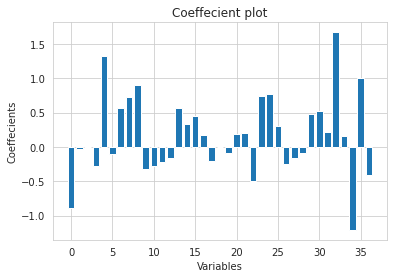

In [66]:
x=range(len(train_x.columns))
c=logreg.coef_.reshape(-1)
plt.bar(x,c)
plt.xlabel('Variables')
plt.ylabel('Coeffecients')
plt.title('Coeffecient plot')

In [67]:
Coeffecients=pd.DataFrame({'Variable':train_x.columns,'Coeffecient':abs(c)})
Coeffecients.head()

,Variable,Coeffecient
0,Pclass,0.893306
1,Age,0.032562
2,Fare,0.004829
3,FamilySize,0.284133
4,Sex_female,1.317457


In [68]:
# Selecting variables with high coeffecients
sign_var=Coeffecients[Coeffecients.Coeffecient>.3]

In [69]:
subset=df[sign_var['Variable'].values]
subset.head()

,Pclass,Sex_female,SibSp_0,SibSp_1,SibSp_2,SibSp_3,Parch_0,Parch_1,Parch_2,Cabin_C,Cabin_D,Cabin_E,Cabin_F,Embarked_C,Embarked_Q,Title_Master,Title_Mr,Title_Mrs,Title_Others
0,3,0,0,1,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0
1,1,1,0,1,0,0,1,0,0,1,0,0,0,1,0,0,0,1,0
2,3,1,1,0,0,0,1,0,0,0,0,0,0,0,0,0,0,0,0
3,1,1,0,1,0,0,1,0,0,1,0,0,0,0,0,0,0,1,0
4,3,0,1,0,0,0,1,0,0,0,0,0,0,0,0,0,1,0,0


In [70]:
subset.shape

(887, 19)

In [71]:
train_x,test_x,train_y,test_y=ms.train_test_split(subset,y,random_state=5,stratify=y)

In [72]:
score=ms.cross_val_score(LogisticRegression(solver='liblinear'),X=train_x,y=train_y,cv=10)
score

array([0.86567164, 0.79104478, 0.80597015, 0.76119403, 0.86567164,
       0.77272727, 0.87878788, 0.8030303 , 0.84848485, 0.84848485])

In [73]:
param_dist={'C':[.1,1,10,100,1000]}
clf=LogisticRegression(solver='liblinear')
clf_cv=ms.RandomizedSearchCV(clf,param_distributions=param_dist,cv=5)
clf_cv.fit(train_x,train_y)
print("Tuned Logistic Regression Parameters: {}".format(clf_cv.best_params_)) 
print("Best score is {}".format(clf_cv.best_score_)) 

/opt/conda/lib/python3.7/site-packages/sklearn/model_selection/_search.py:281: UserWarning: The total space of parameters 5 is smaller than n_iter=10. Running 5 iterations. For exhaustive searches, use GridSearchCV.
  % (grid_size, self.n_iter, grid_size), UserWarning)


Tuned Logistic Regression Parameters: {'C': 10}
Best score is 0.8300751879699246


/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  extra_warning_msg=_LOGISTIC_SOLVER_CONVERGENCE_MSG)
/opt/conda/lib/python3.7/site-packages/sklearn/linear_model/_logistic.py:940: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression


In [74]:
clf=LogisticRegression(solver='liblinear',C=10)
clf.fit(train_x,train_y)
clf.score(train_x,train_y),clf.score(test_x,test_y)

(0.8421052631578947, 0.8243243243243243)